In [1]:
import pandas as pd
import h5py
import numpy as np
import time as tm
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm

# Import the `datetools` module from `pandas`
from pandas.core import datetools

/home/e817/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data_all=pd.read_csv('less_rank_150',sep='\t')
#data=data.loc[:,['artist_id','weeks']]
data=data_all[(data_all['weeks']!=5)]
data.head()

,msno,played_at,day,week,artist_id,weeks
0,35394642,2016-12-06 16:55:12.000,6,Tuesday,4227444.0,2
1,15026353,2016-12-06 16:47:00.000,6,Tuesday,20326.0,2
2,22207733,2016-12-06 16:46:32.571,6,Tuesday,16813.0,2
3,45244798,2016-12-06 16:45:17.353,6,Tuesday,463097.0,2
4,84461132,2016-12-06 16:46:24.997,6,Tuesday,2537966.0,2


In [3]:
q=pd.read_csv('song_list_add_table',sep='\t')
q=q.loc[:,['artist_name','artist_id']]
q.head()

/home/e817/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,artist_name,artist_id
0,Dave Davies,497316.0
1,Suns Of Arqa,27966.0
2,Gay Lounge 1,325278.0
3,Nina Simone,680.0
4,Nursery Tunes,4632030.0


In [4]:
q=q[q['artist_id'].isin(data.artist_id)]
q.drop_duplicates(subset='artist_id', keep='first', inplace=True)

In [5]:
data=data.merge(q,on='artist_id', how='left')
data.head()

,msno,played_at,day,week,artist_id,weeks,artist_name
0,35394642,2016-12-06 16:55:12.000,6,Tuesday,4227444.0,2,DJ Snake
1,15026353,2016-12-06 16:47:00.000,6,Tuesday,20326.0,2,方大同 (Khalil Fong)
2,22207733,2016-12-06 16:46:32.571,6,Tuesday,16813.0,2,貴族精選
3,45244798,2016-12-06 16:45:17.353,6,Tuesday,463097.0,2,朱俐靜 (Miu Chu)
4,84461132,2016-12-06 16:46:24.997,6,Tuesday,2537966.0,2,EXID


In [6]:
'''
name_dic=dict()
for i in q['artist_id'].values:
    name_dic[i]=q[q['artist_id']==i]['artist_name']
name_dic
'''

"\nname_dic=dict()\nfor i in q['artist_id'].values:\n    name_dic[i]=q[q['artist_id']==i]['artist_name']\nname_dic\n"

In [7]:
'''
data['name']=data['artist_id'].apply(lambda n : name_dic.get(n))
data
'''

"\ndata['name']=data['artist_id'].apply(lambda n : name_dic.get(n))\ndata\n"

In [8]:
data=data.loc[:,['artist_name','played_at']]
data.head()

,artist_name,played_at
0,DJ Snake,2016-12-06 16:55:12.000
1,方大同 (Khalil Fong),2016-12-06 16:47:00.000
2,貴族精選,2016-12-06 16:46:32.571
3,朱俐靜 (Miu Chu),2016-12-06 16:45:17.353
4,EXID,2016-12-06 16:46:24.997


In [9]:
data['played_at'] = pd.to_datetime(data['played_at'])

In [10]:
data['played_at2']=data['played_at'].apply(lambda t: t.strftime('%Y-%m-%d'))

In [11]:
data.head()

,artist_name,played_at,played_at2
0,DJ Snake,2016-12-06 16:55:12.000,2016-12-06
1,方大同 (Khalil Fong),2016-12-06 16:47:00.000,2016-12-06
2,貴族精選,2016-12-06 16:46:32.571,2016-12-06
3,朱俐靜 (Miu Chu),2016-12-06 16:45:17.353,2016-12-06
4,EXID,2016-12-06 16:46:24.997,2016-12-06


In [12]:
data2=data.loc[:,['artist_name','played_at2']]
data2['number']=0
data2

,artist_name,played_at2,number
0,DJ Snake,2016-12-06,0
1,方大同 (Khalil Fong),2016-12-06,0
2,貴族精選,2016-12-06,0
3,朱俐靜 (Miu Chu),2016-12-06,0
4,EXID,2016-12-06,0
5,DJ Snake,2016-12-06,0
6,蔡健雅 (Tanya Chua),2016-12-06,0
7,証聲音樂圖書館 ECHO MUSIC,2016-12-06,0
8,DJ Snake,2016-12-06,0
9,方大同 (Khalil Fong),2016-12-06,0


In [13]:
d3=data2.groupby(['artist_name','played_at2']).count().reset_index()
d3

,artist_name,played_at2,number
0,AMIT,2016-12-01,35895
1,AMIT,2016-12-02,34807
2,AMIT,2016-12-03,37650
3,AMIT,2016-12-04,34084
4,AMIT,2016-12-05,33707
5,AMIT,2016-12-06,33387
6,AMIT,2016-12-07,33548
7,AMIT,2016-12-08,35721
8,AMIT,2016-12-09,38330
9,AMIT,2016-12-10,41562


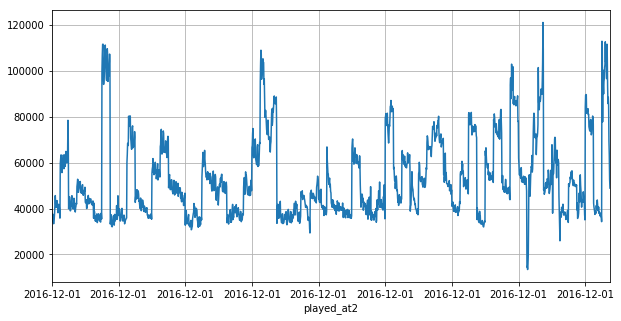

In [14]:
d4=d3.loc[:,['number','played_at2']]
# Plot the closing prices for `aapl`
d4.set_index('played_at2')['number'].plot(grid=True,figsize=(10,5))

# Show the plot
plt.show()

In [15]:
d3['played_at2']=pd.to_datetime(d3['played_at2'])
dd3=d3.set_index(['artist_name','played_at2'])
dd3

number
artist_name      played_at2        
AMIT             2016-12-01   35895
                 2016-12-02   34807
                 2016-12-03   37650
                 2016-12-04   34084
                 2016-12-05   33707
                 2016-12-06   33387
                 2016-12-07   33548
                 2016-12-08   35721
                 2016-12-09   38330
                 2016-12-10   41562
                 2016-12-11   45643
                 2016-12-12   42211
                 2016-12-13   40611
                 2016-12-14   42234
                 2016-12-15   40626
                 2016-12-16   43469
                 2016-12-17   41718
                 2016-12-18   40581
                 2016-12-19   38191
                 2016-12-20   38569
                 2016-12-21   41856
                 2016-12-22   40912
                 2016-12-23   40856
                 2016-12-24   38058
                 2016-12-25   35825
Ariana Grande    2016-12-01   59633
                 2016-12-02   61248
                 2016-12-03   63344
                 2016-12-04   63282
                 2016-12-05   56907
...                             ...
飛兒樂團 (F.I.R.)    2016-12-21   37971
                 2016-12-22   37847
                 2016-12-23   36438
                 2016-12-24   36836
                 2016-12-25   34275
黃美珍 (Jane Huang) 2016-12-01  112837
                 2016-12-02  110167
                 2016-12-03   77739
                 2016-12-04  100306
                 2016-12-05   93074
                 2016-12-06   89900
                 2016-12-07   95259
                 2016-12-08   96523
                 2016-12-09  101373
                 2016-12-10  102679
                 2016-12-11  112595
                 2016-12-12  103872
                 2016-12-13  104477
                 2016-12-14  102746
                 2016-12-15   96542
                 2016-12-16  111570
                 2016-12-17  105876
                 2016-12-18   93173
                 2016-12-19   85695
                 2016-12-20   88448
                 2016-12-21   85144
                 2016-12-22   69319
                 2016-12-23   63395
                 2016-12-24   52825
                 2016-12-25   48894

[1675 rows x 1 columns]

In [16]:
all_returns = np.log(dd3 / dd3.shift(1))
all_returns.head()

number
artist_name played_at2          
AMIT        2016-12-01       NaN
            2016-12-02 -0.030779
            2016-12-03  0.078514
            2016-12-04 -0.099505
            2016-12-05 -0.011123

In [17]:
one_returns=all_returns.iloc[all_returns.index.get_level_values('artist_name') == '方大同 (Khalil Fong)']
one_returns

number
artist_name       played_at2          
方大同 (Khalil Fong) 2016-12-01  0.222101
                  2016-12-02  0.010801
                  2016-12-03 -0.108706
                  2016-12-04  0.072026
                  2016-12-05 -0.005172
                  2016-12-06  0.124932
                  2016-12-07 -0.017106
                  2016-12-08 -0.068395
                  2016-12-09  0.164381
                  2016-12-10 -0.241374
                  2016-12-11  0.016216
                  2016-12-12  0.003444
                  2016-12-13  0.055457
                  2016-12-14  0.005893
                  2016-12-15 -0.084621
                  2016-12-16  0.039365
                  2016-12-17 -0.019051
                  2016-12-18 -0.031729
                  2016-12-19 -0.014189
                  2016-12-20  0.136410
                  2016-12-21 -0.003289
                  2016-12-22 -0.013535
                  2016-12-23  0.127787
                  2016-12-24 -0.242276
                  2016-12-25 -0.107302

In [18]:
one_returns.index = one_returns.index.droplevel('artist_name')
one_returns

,number
played_at2,
2016-12-01,0.222101
2016-12-02,0.010801
2016-12-03,-0.108706
2016-12-04,0.072026
2016-12-05,-0.005172
2016-12-06,0.124932
2016-12-07,-0.017106
2016-12-08,-0.068395
2016-12-09,0.164381


In [33]:
two_returns=all_returns.iloc[all_returns.index.get_level_values('artist_name') == '蕭亞軒 (Elva Hsiao)']
two_returns

number
artist_name      played_at2          
蕭亞軒 (Elva Hsiao) 2016-12-01 -0.230039
                 2016-12-02 -0.045531
                 2016-12-03 -0.073809
                 2016-12-04 -0.008788
                 2016-12-05  0.043031
                 2016-12-06 -0.033079
                 2016-12-07 -0.033365
                 2016-12-08  0.079853
                 2016-12-09  0.002633
                 2016-12-10 -0.108444
                 2016-12-11 -0.006363
                 2016-12-12  0.037998
                 2016-12-13 -0.006183
                 2016-12-14 -0.018170
                 2016-12-15 -0.017104
                 2016-12-16  0.051716
                 2016-12-17 -0.041719
                 2016-12-18  0.026799
                 2016-12-19 -0.052514
                 2016-12-20  0.063581
                 2016-12-21 -0.059436
                 2016-12-22  0.027528
                 2016-12-23  0.021685
                 2016-12-24 -0.054585
                 2016-12-25 -0.060406

In [36]:
two_returns.index = two_returns.index.droplevel('artist_name')
two_returns

,number
played_at2,
2016-12-01,-0.230039
2016-12-02,-0.045531
2016-12-03,-0.073809
2016-12-04,-0.008788
2016-12-05,0.043031
2016-12-06,-0.033079
2016-12-07,-0.033365
2016-12-08,0.079853
2016-12-09,0.002633


In [37]:
return_data = pd.concat([one_returns, two_returns], axis=1)[1:]
return_data.columns = ['方大同 (Khalil Fong)', '蕭亞軒 (Elva Hsiao)']

In [22]:
# Add a constant 
X = sm.add_constant(return_data['方大同 (Khalil Fong)'])
X

,const,方大同 (Khalil Fong)
played_at2,,
2016-12-02,1.0,0.010801
2016-12-03,1.0,-0.108706
2016-12-04,1.0,0.072026
2016-12-05,1.0,-0.005172
2016-12-06,1.0,0.124932
2016-12-07,1.0,-0.017106
2016-12-08,1.0,-0.068395
2016-12-09,1.0,0.164381
2016-12-10,1.0,-0.241374


In [38]:
model = sm.OLS(return_data['蕭亞軒 (Elva Hsiao)'],X).fit()
model

In [39]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       蕭亞軒 (Elva Hsiao)   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     7.579
Date:                Thu, 08 Feb 2018   Prob (F-statistic):             0.0116
Time:                        02:14:39   Log-Likelihood:                 43.032
No. Observations:                  24   AIC:                            -82.06
Df Residuals:                      22   BIC:                            -79.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0091      0.00

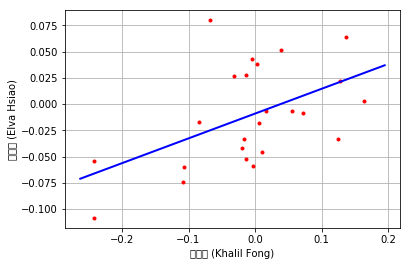

In [40]:
plt.plot(return_data['方大同 (Khalil Fong)'], return_data['蕭亞軒 (Elva Hsiao)'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('方大同 (Khalil Fong)')
plt.ylabel('蕭亞軒 (Elva Hsiao)')

# Show the plot
plt.show()

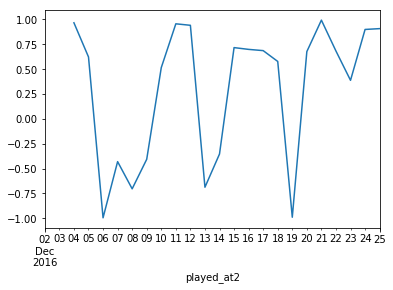

In [41]:

# Plot the rolling correlation
return_data['蕭亞軒 (Elva Hsiao)'].rolling(window=3).corr(return_data['方大同 (Khalil Fong)']).plot()

# Show the plot
plt.show()

In [27]:
d3

,artist_name,played_at2,number
0,AMIT,2016-12-01,35895
1,AMIT,2016-12-02,34807
2,AMIT,2016-12-03,37650
3,AMIT,2016-12-04,34084
4,AMIT,2016-12-05,33707
5,AMIT,2016-12-06,33387
6,AMIT,2016-12-07,33548
7,AMIT,2016-12-08,35721
8,AMIT,2016-12-09,38330
9,AMIT,2016-12-10,41562


In [28]:
model.params

const               -0.000343
方大同 (Khalil Fong)    0.358499
dtype: float64

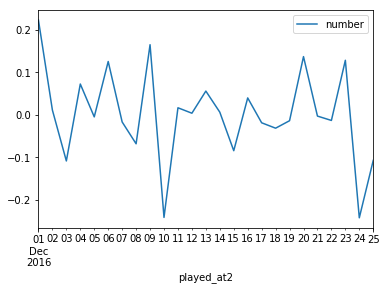

In [29]:
one_returns.plot()

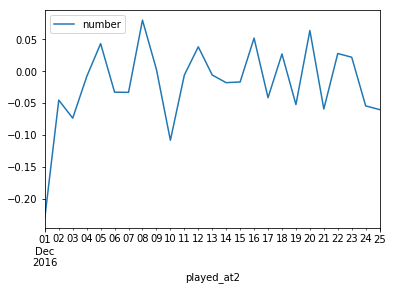

In [42]:
two_returns.plot()

In [31]:
return_data

,方大同 (Khalil Fong),戴愛玲 (Ailing Tai)
played_at2,,
2016-12-02,0.010801,0.040575
2016-12-03,-0.108706,0.137956
2016-12-04,0.072026,-0.174235
2016-12-05,-0.005172,-0.016517
2016-12-06,0.124932,0.001882
2016-12-07,-0.017106,0.285114
2016-12-08,-0.068395,-0.344130
2016-12-09,0.164381,0.106044
2016-12-10,-0.241374,-0.111615


In [32]:
data2.drop_duplicates(subset='artist_name', keep='first', inplace=False)

,artist_name,played_at2,number
0,DJ Snake,2016-12-06,0
1,方大同 (Khalil Fong),2016-12-06,0
2,貴族精選,2016-12-06,0
3,朱俐靜 (Miu Chu),2016-12-06,0
4,EXID,2016-12-06,0
6,蔡健雅 (Tanya Chua),2016-12-06,0
7,証聲音樂圖書館 ECHO MUSIC,2016-12-06,0
10,張韶涵 (Angela Chang),2016-12-06,0
11,Lady Gaga,2016-12-06,0
13,David Guetta,2016-12-06,0
